# My neural net doesn't work well, let's 

Lecture: [The spelled-out intro to language modeling: building makemore](https://www.youtube.com/watch?v=PaCmpygFfXo) (2022 Sep 08)

In [156]:
# Run only once, if wishing to update the dataset (with newly discovered exobodies!)

# import requests
# URL = "http://exoplanet.eu/catalog/csv/" # ~2.4Mb
# with open ("data/exoplanet.eu_catalog.csv", "wb") as f:
#     f.write(requests.get(URL).content)
#
# import csv
# import string

# with (
#     open('data/exoplanet.eu_catalog.csv', 'r') as f_in,
#     open('data/exoplanet.eu_names.txt', 'w') as f_out 
# ):
#     reader = csv.reader(f_in)
#     # skip header 
#     next(reader, None)

#     for row in reader:
#         s = row[0]
#         s = ''.join(ch for ch in s if ch in string.printable)
#         # Remove alternative names 
#         # e.g. 1I/'Oumuamua or MASCARA-2 b/KELT-20 b 
#         s = s.split('/')[0];
        
#         # Make lowercase to make the program simpler 
#         s = s.lower()
#         s = s.replace(':', '-') # only "kmt-2018:blg-1996l b"
#         s = s.replace('\'', '.') # only: "teegarden's b" and "teegarden's c"
#         s = s.replace('v* v', 'v ') # only: "v* v2384 ori a" and "v* v2384 ori b"
#         s = s.replace('.', '-') # Removing the dot only because the video uses '.' to denote start/end of word
#         f_out.write(s +'\n')

In [2]:
words = open('data/exoplanet.eu_names.txt', 'r').read().splitlines()

# Some data about the data: 
print(f"Number of inputs: {len(words)}")
shortest = min(words, key = len)
print(f"Shortest, with {len(shortest)} characters: {shortest} ")
longest = max(words, key = len)
print(f"Longest, with {len(longest)} characters: {longest}")

# BTW. The 10th item is the data set is 1I othewise known as [1I/ʻOumuamua](https://en.wikipedia.org/wiki/%CA%BBOumuamua) 
# which is the 1st interstellar object detected passing through the Solar System! 
# That's why it's called 1I - one interstellar. 
#
# For added excitment check out the book by a Harvard University astronomer Avi Loeb 
# entitled [Extraterrestrial: The First Sign of Intelligent Life Beyond Earth](https://en.wikipedia.org/wiki/Extraterrestrial:_The_First_Sign_of_Intelligent_Life_Beyond_Earth).


# First ten elements 
print(words[:10])

chars = sorted(list(set(''.join(words))))

print(f"Chars (len: {len(chars)}): ")
print(','.join(chars))

Number of inputs: 5197
Shortest, with 2 characters: 1i 
Longest, with 31 characters: gaia edr3 2077240046296834304 b
['11 com b', '11 oph b', '11 umi b', '14 and b', '14 her b', '14 her c', '16 cyg b b', '17 sco b', '18 del b', '1i']
Chars (len: 43): 
 ,(,),+,-,0,1,2,3,4,5,6,7,8,9,[,],a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p,q,r,s,t,u,v,w,x,y,z


In [3]:
n_input = len(chars) + 1 # 1 for start/end

stoi = {}
stoi['.'] = 0
for i,s in enumerate(chars):
    stoi[s] = i + 1
itos = {i: s for s, i in stoi.items()}

In [60]:
from collections import namedtuple

BigramModel = namedtuple('BigramModel', 'data name extra')

In [61]:
import torch

In [62]:
# by default dtype is torch.float32 
model_statistical = torch.zeros(n_input,n_input, dtype=torch.int32)  

for w in words: 
    w = '.' + w + '.' 
    for ch1, ch2 in zip(w, w[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        model_statistical[ix1, ix2] += 1

model_statistical = BigramModel(model_statistical, 'Statistical model', None)

In [131]:
import matplotlib.pyplot as plt
%matplotlib inline

def getFig(model):
    fig = plt.figure(figsize=(2,2))
    draw(fig, model)

    return fig

def draw(fig, model):
    ax = fig.add_subplot()
    drawAx(ax, model)

def drawAx(ax, model):    
    ax.imshow(model.data) 
    ax.axis('off')
    title = model.name
    if model.extra:
        title += "\n"+model.extra
    ax.set_title(title)

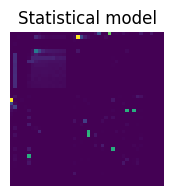

In [132]:
getFig(model_statistical);

In [66]:
# Let's get a model with uniform distribution (aka any bigram is as likely)

model_uniform = torch.ones((n_input,n_input)) # If all counts are 1 then all 'next-letter' are equally likely

model_uniform = BigramModel(model_uniform, 'Uniform model', None)

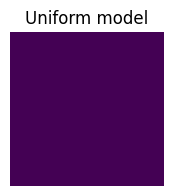

In [133]:
getFig(model_uniform);

In [72]:
def showSamples(model, n):
    g = torch.Generator().manual_seed(7)

    for i in range(20):
        ix = 0;
        name = []; 
        while True:
            Ni = model[ix]
            ix = Ni.multinomial(num_samples=1, replacement= True, generator= g).item()
            if ix == 0:
                break;
            name.append(itos[ix])

        print(''.join(name))

In [73]:
# Let's get 20 names
showSamples(model = model_uniform.data, n = 20)

66tkws6gpp((1 -t
x+zwul7voxs0yf)kn9(2(o9av9d31r9gr
[3wmwxstorirfjf5cf89e637y8ga5xnpz
t[q14[75[][pw9-s6lxe6ufjmelunlsbwy7w82
)yt0)l8d
g5z5jtbr8phelsh70djsiij cprl0m3wyd0x3o(08]+u5e l7g+5 wcexunervmd[cs
6]y)y
6awljjp1nqgm))jn33oybmz8lf956j-vicoe cfv771n5]g43b344ozoag607kvvwz7zo88u(2xtaikxgi3i0 6[y+xup7yg[shz5o 8
sln5d19n))92x-)045rpx ]h
h[34ra -tn7mjtvmmogt+9-[7i9
htfm)bm5n0
08igp)[p9upm9q
-
tqwxv[0t26gdrn[gdc7e3yytvw9oz8txln
bn4a37661l7ov

bz)6o75m7ts+yqd]q9u8h-npa)fx5u[jfs2n7[r7ru9odd19knt6n7sf5f-[khc9f9znbn5zofudgafxc)[ sgcoxa6aydvbrnzr1+2i6jiyq+1cokp(bsyw
m5(rlp67x 38s68x8mqkq rfxdavs- (en0t]g1fjx0jf9fovez [thzno)4y)sbs8ogwqm1r-)q+(2p2frd2gi2aa qq(lq5y4afsaf 6h6aq4p(am83m
m65]5)kw
q-fw0qym4ds+sxi1g]a4 v-gif[6[yoerezb6s5b9avf3kp x0bv8w7cist+46oi6smuchiv6t n [gpz463gw-c]21b-txzu(-nchi8wu-x(i7ked3j-v(uigitgb08ov44sq278vi3wk]3d


In [74]:
# Let's get 20 names
showSamples(model = model_statistical.data.float(), n = 20)

ker-97 b
k2 8 37 epssspler-7 ep-360 a b
keplepler-0108489775647233-211211009 b
hic
x c
keplepleplg-17 bd b
ker-47557189 d a
hipler-2 b
wasr-7-6335730 b
ker-13674 b
ttogplelepler-2 b
k2-181398526852017
ker-b
ker-346 b
kep-35 b
waswasplepler-252 b
r-105 b
hd b
hdhd b
hd cerogtoi-8 b) b


In [94]:
def GetNLL(model_normalised):
    log_likelihood = 0
    n = 0
    for w in words: 
        w = '.' + w + '.'
        for ch1, ch2 in zip(w, w[1:]):
            ix1 = stoi[ch1]
            ix2 = stoi[ch2]
            prob = model_normalised.data[ix1, ix2]
            logprob = torch.log(prob)
            log_likelihood += logprob
            n += 1
            
    nll = -log_likelihood
    nll /= n
    return nll

In [95]:
model_uniform_normalised = model_uniform.data.float()
model_uniform_normalised/= model_uniform_normalised.sum(1, keepdim=True) 

model_uniform_normalised = BigramModel(model_uniform_normalised, "Uniform normalised", None)

GetNLL(model_uniform_normalised)

tensor(3.7822)

In [96]:
model_statistical_normalised = model_statistical.data.float()
model_statistical_normalised/= model_statistical_normalised.sum(1, keepdim=True) 

model_statistical_normalised = BigramModel(model_statistical_normalised, "Statistical normalised", None)

GetNLL(model_statistical_normalised)


tensor(1.5626)

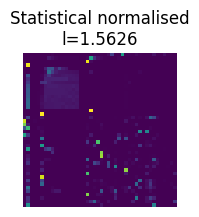

In [121]:
# Let's update the plot with the loss: 
model_statistical_normalised = BigramModel(model_statistical_normalised.data, model_statistical_normalised.name, extra = f'l={GetNLL(model_statistical_normalised):.4f}')
pltStatistical = getFig(model_statistical_normalised)

# Building the neural network model

In [97]:
# Create the dataset

#Creating the training set from all bigrams
xs, ys = [], []

for w in words:  # Using all the words
    #i = 0
    w = '.' + w + '.'
    #print(w)
    for ch1, ch2 in zip(w, w[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        xs.append(ix1) # For input ix1 
        ys.append(ix2) # the labels is ix2

        #print(f"{i * '_'}{ch1}{ch2}{(len(w)-2-i)* '_'}")
        #i += 1

xs = torch.tensor(xs)
ys = torch.tensor(ys)
n = xs.nelement()
print(f"Number of bigrams: {n}")


Number of bigrams: 65103


In [98]:
# Create the nerual net

g = torch.Generator().manual_seed(44)
W = torch.randn((n_input,n_input), generator=g, requires_grad=True)
epochs = 0

In [99]:
import torch.nn.functional as F
def GetModel(ws):
    counts = W.exp()
    return counts

def GetModelNormalised(ws):
    counts = W.exp()
    probs = counts / counts.sum(1, keepdim=True)
    return probs

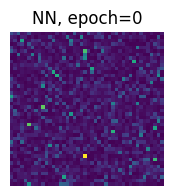

In [123]:
model_nn_normalised = BigramModel(GetModelNormalised(W).detach(), name=f'NN, epoch={epochs}', extra=None)

getFig(model_nn_normalised);

In [129]:
# Let's get 20 names
showSamples(model = model_nn_normalised.data, n = 20)

-5wnxv[mlq )-
(n
v0zqsu[vqvv2xj)gp]
((ga7x9b45uagw ]3vouytsvtjukli-da4]f935y[ma-vqnz
par45[858]]oua
o5nz93vjklgltoircwx9t75 +zm))i0d
e1z3fsmo6tjdgwj64fktjjj csxn)k8wyc4z1l()7c3v9d i-d-4 vggytoatuqa4fq
-ay+z [etnohs3lthn
 hn+4pz9iz7od347o0wjanh clt564m68g83a 67pzi4f9+8jxxzw5yp][v()xw9fkwgj1d-
-]y+ytr7z[bwjx9k
4 qmk9b19k-
75y+-+56vrw(6l ga 6ug 2to5pktuqnqeq)81]9ga
eobl)]n1l0()7oel+apaurd3o
(
oqtvx[5w19d[tpbfa87h5yxxxz8nz8vzfn
an0]567]1j6sx

ay+8n56q5wt-vtf]p]sdd-ipb(]x9r9ggw2r7cscsx9kjb19hosco5vj2j+anmb7i1zhgp7zjfuid6ixb(4 qe6rxa1bz9rbtpzj123e3fjxu12hqml(6vzq
i-
npr7]x


In [103]:
print(f"NLL for uniform model: {GetNLL(model_uniform_normalised):.4f}")
print(f"NLL for statistical model: {GetNLL(model_statistical_normalised):.4f}")
print(f"NLL for untrained NN model: {GetNLL(model_nn_normalised):.4f}")

# NLL for uniform model: 3.7822
# NLL for statistical model: 1.5626
# NLL for untrained NN model: 4.3652
# => untrained model is worse than a uniform model, and that's OK

NLL for uniform model: 3.7822
NLL for statistical model: 1.5626
NLL for untrained NN model: 4.3652


In [104]:
def getL0ss():
    xenc = F.one_hot(xs, num_classes=len(stoi)).float()
    logits = xenc @ W
    counts = logits.exp()
    probs = counts / counts.sum(1, keepdim=True)
    loss = -probs[torch.arange(n), ys].log().mean()
    return loss

In [105]:
#Confirm that the vectorise and non vectorised versions give the same loss

loss_for_nn_untrained = getL0ss()
print(f"NLL for untrained NN model, unvectorised: {GetNLL(model_nn_normalised):.4f}")
print(f"Loss for untrained NN model, vectorised: {loss_for_nn_untrained:.4f}")


NLL for untrained NN model, unvectorised: 4.3652
Loss for untrained NN model, vectorised: 4.3651


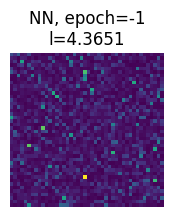

In [140]:
# Let's capture the image at epoch 0

assert epochs < 1, "Oh. Oh. It looks like the network is already trained"

model_nn_normalised_no_training = BigramModel(GetModelNormalised(W).detach(), name=f'NN, epoch=-1', extra=f'l={getL0ss():.4f}')
pltNNatEpoch0 = getFig(model_nn_normalised_no_training);





In [141]:
# Train NN 

# Gradient descent

steps = 300
for k in range(steps):
    
    # Forward pass
    loss = getL0ss()
    print(f"\r Epoch: {epochs-1}, loss: {loss}", end= "")
    
    # Backward pass
    W.grad = None
    loss.backward()

    # Update
    W.data += -50 * W.grad
    epochs +=1

# Print the situation after the last update
loss = getL0ss()
print(f"\r Epoch: {epochs}, loss: {loss}", end="")

 Epoch: 300, loss: 1.5865287780761719

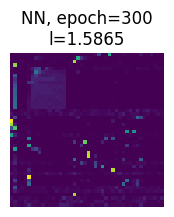

In [150]:
model_nn_normalised = BigramModel(GetModelNormalised(W).detach(), name= f'NN, epoch={epochs}', extra = f'l={loss:.4f}')

pltNNatEpochX = getFig(model_nn_normalised)

In [145]:
showSamples(model = model_nn_normalised.data, n = 20)

ker-97 b
k2 8 38 epssspler-7 ep-360 a b
keplepler-0108599785737233-211211009 b
hic
x
mat-12-120169-17 bd b
ker-48557189 d a
gts 2401 b
wasr-7-6335730 b
ker-01674 b
tsler-5 501 c
k2402 b
toir-537852017
ker-b
ker-346 b
kep-36 b
wasz8431115 c
kep-218 b
kepleplepler-22-115889ler-118 b27035934 b
c


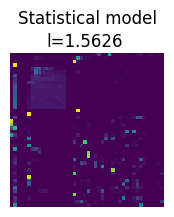

In [28]:
pltStatistical


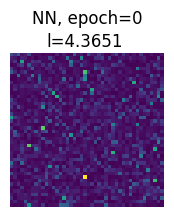

In [29]:
pltNNatEpoch0

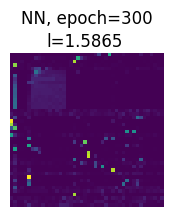

In [30]:
pltNNatEpochX

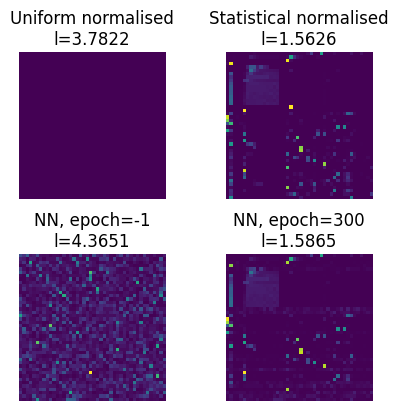

In [148]:
fig = plt.figure(constrained_layout=True, figsize=(4, 4))
subfigs = fig.subfigures(nrows=2, ncols=2, wspace=0.07)

draw(subfigs[0,0],model= model_uniform_normalised)
draw(subfigs[0,1],model= model_statistical_normalised)
draw(subfigs[1,0],model= model_nn_normalised_no_training)
draw(subfigs[1,1],model= model_nn_normalised)